<a href="https://colab.research.google.com/github/cbindushree/cv/blob/main/automobile_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as matlab
import statsmodels

In [12]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Read the CSV file
auto = pd.read_csv("Automobile_data.csv")

# Display the data
print(auto.head())



Saving Automobile_data.csv to Automobile_data.csv
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   



In [13]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [15]:
#data sanitization
auto.replace('?', None, inplace=True)
auto= auto.apply(pd.to_numeric, errors='coerce')  # Convert after replacing invalid values


In [17]:
auto.columns = [col.strip().lower().replace('-', '_') for col in auto.columns]


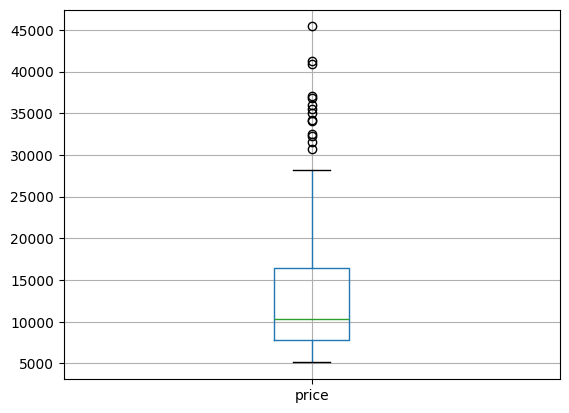

In [18]:
import matplotlib.pyplot as plt
auto.boxplot(column=['price'])
plt.show()


In [22]:
import numpy as np
import pandas as pd

# Convert columns to numeric, forcing invalid values to NaN
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['price'] = pd.to_numeric(auto['price'], errors='coerce')

# Drop rows with NaN values in horsepower and price
auto_clean = auto.dropna(subset=['horsepower', 'price'])

# Calculate the correlation coefficient using numpy
correlation = np.corrcoef(auto_clean['horsepower'], auto_clean['price'])

print(correlation)



[[1.         0.81053308]
 [0.81053308 1.        ]]


In [23]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming 'auto' is the DataFrame containing your dataset
# Convert 'horsepower' and 'price' columns to numeric (if not already)
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['price'] = pd.to_numeric(auto['price'], errors='coerce')

# Drop rows with NaN values in 'horsepower' or 'price' columns
auto_clean = auto.dropna(subset=['horsepower', 'price'])

# Perform OLS regression with 'horsepower' as the predictor for 'price'
model = smf.ols(formula='price ~ horsepower', data=auto_clean)

# Fit the model to get the results
fitted_model = model.fit()

# Display the summary of the regression
print(fitted_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     377.3
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.19e-47
Time:                        17:29:20   Log-Likelihood:                -1963.3
No. Observations:                 199   AIC:                             3931.
Df Residuals:                     197   BIC:                             3937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4562.1750    974.995     -4.679      0.0

In [25]:
import statsmodels.formula.api as sm

# Assuming 'auto' is your DataFrame
model = sm.ols(formula='price ~ engine_size', data=auto)
fitted_model = model.fit()

# Display the summary of the regression
print(fitted_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     633.5
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           9.27e-64
Time:                        17:34:18   Log-Likelihood:                -1946.0
No. Observations:                 201   AIC:                             3896.
Df Residuals:                     199   BIC:                             3903.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7963.3389    884.835     -9.000      

In [26]:
import statsmodels.formula.api as sm

# Assuming 'auto' is the DataFrame containing your dataset
model = sm.ols(formula='price ~ engine_size + curb_weight + horsepower', data=auto)
fitted_model = model.fit()

# Display the summary of the regression
print(fitted_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     279.4
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           2.53e-70
Time:                        17:36:44   Log-Likelihood:                -1903.9
No. Observations:                 199   AIC:                             3816.
Df Residuals:                     195   BIC:                             3829.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -1.37e+04   1359.876    -10.076      

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
import sklearn as sk
from sklearn.linear_model import LinearRegression

# Drop rows with NaN values in 'horsepower' or 'price'
auto_cleaned = auto.dropna(subset=["horsepower", "price"])

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(auto_cleaned[["horsepower"]], auto_cleaned[["price"]])




LinearRegression()

In [34]:
# Print the intercept and coefficient
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)


Intercept: [-4562.17499567]
Coefficient: [[172.20625117]]


In [36]:
import sklearn as sk
from sklearn.linear_model import LinearRegression

# Drop rows with NaN values in 'engine-size' or 'price'
auto_cleaned = auto.dropna(subset=["engine_size", "price"])

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(auto_cleaned[["engine_size"]], auto_cleaned[["price"]])

# Print the intercept and coefficient
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)


Intercept: [-7963.33890628]
Coefficient: [[166.86001569]]


In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Drop rows with NaN values in 'horsepower' or 'price'
auto_cleaned = auto.dropna(subset=["horsepower", "price"])

# Model 1 - with engine-size and price (after handling NaN values)
lr1 = LinearRegression()
lr1.fit(auto_cleaned[["engine_size"]], auto_cleaned[["price"]])
r_squared1 = lr1.score(auto_cleaned[["engine_size"]], auto_cleaned[["price"]])

# Model 2 - with horsepower and price (after handling NaN values)
lr2 = LinearRegression()
lr2.fit(auto_cleaned[["horsepower"]], auto_cleaned[["price"]])
r_squared2 = lr2.score(auto_cleaned[["horsepower"]], auto_cleaned[["price"]])

print("Model 1 R-squared (engine-size vs price):", r_squared1)
print("Model 2 R-squared (horsepower vs price):", r_squared2)


Model 1 R-squared (engine-size vs price): 0.7636784045230649
Model 2 R-squared (horsepower vs price): 0.6569638772307338


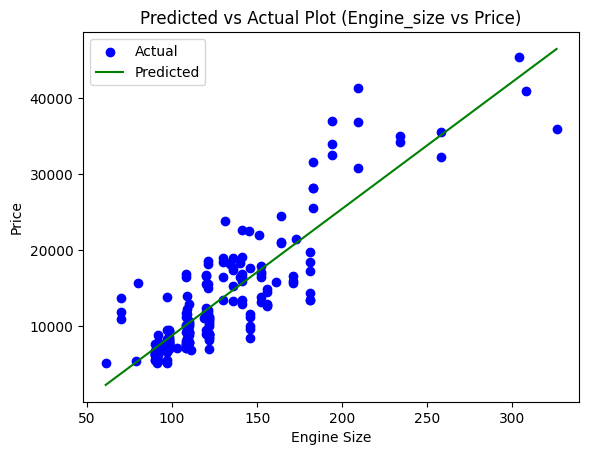

In [39]:
import matplotlib.pyplot as plt

# Prepare the data by removing the target column 'price' (or any other columns)
new_data = auto_cleaned.drop(["price"], axis=1)

# Use the trained model to make predictions for 'engine-size'
new_data["pred_values"] = lr1.predict(new_data[["engine_size"]])

# Add actual values (the actual 'price' column) to the new_data DataFrame
new_data["Actual"] = auto_cleaned["price"]

# Sort the data by predicted values for better visualization
new_data = new_data.sort_values(["pred_values"])

# Plot the predicted vs actual values
plt.scatter(new_data["engine_size"], new_data["Actual"], color='blue', label="Actual")
plt.plot(new_data["engine_size"], new_data["pred_values"], color='green', label="Predicted")

# Add labels and title
plt.title('Predicted vs Actual Plot (Engine_size vs Price)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()
